In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl

In [101]:
# Plot style
import seaborn as sns
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette("Paired")) 
from matplotlib import rc
rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Times']})

plt.rc('mathtext', fontset='stix')
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('font',size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('lines', linewidth=2)
plt.rc('lines', markersize=2)
plt.rc('legend', fontsize=18)    

In [96]:
params_bacco = {'Omega_m' : 0.31,
    'Omega_c'   : 0.31-0.05,
    'Omega_cb'  : 0.31,
    'omega_cold'    :  0.31, 
    'omega_baryon'  :  0.05,
    'sigma8_cb' : 0.83,
    'sigma8_cold'   :  0.83,
    'Omega_b'   : 0.05,
    'ns'        : 0.96,
    'h'         : 0.68,
    'hubble'        :  0.68,
    'Mnu'       : 0.0,
    'neutrino_mass' :  0.,
    'w0'        : -1.0,
    'wa'        : 0.0, 
    'b1L_1': 0.187684,
    'b1L_2': 0.312375,
    'b1L_3': 0.45121,
    'b1L_4': 0.60626,
    'b1L_5': 0.779385,
    'b2L_1': -0.1322075,
    'b2L_2': -0.0345375,
    'b2L_3': 0.0579305,
    'b2L_4': 0.133662,
    'b2L_5': 0.232387,
    'bs2L_1': 0.1127485,
    'bs2L_2': 0.0036835,
    'bs2L_3': -0.1261985,
    'bs2L_4': -0.285537,
    'bs2L_5': -0.406101,
    'blaplL_1': -0.100126,
    'blaplL_2': -0.1563475,
    'blaplL_3': -0.115281,
    'blaplL_4': 0.1059295,
    'blaplL_5': 0.361450,
}     

In [97]:
# CCL initialization
cosmo_nl = ccl.Cosmology(Omega_c=params_bacco['Omega_c'], 
                         Omega_b=params_bacco['Omega_b'], 
                         h=params_bacco['h'], 
                         n_s=params_bacco['ns'], 
                         sigma8=params_bacco['sigma8_cb'],
                         m_nu=params_bacco['Mnu'], 
                         w0=params_bacco['w0'],
                         wa=params_bacco['wa'],
                         Omega_k = 0.,
                         T_ncdm=0,
                         transfer_function='boltzmann_camb'
                         )

In [98]:
### DO NOT RUN THIS CELL IN THE SAME ENVIRONMENT AS BACCO!!!!!
h = params_bacco['h']

# transformation from bacco to ccl as discussed in nonlinear_bias_notebook.ipynb
bin_i = 4
b1L_ccl = params_bacco[f'b1L_{bin_i+1}']+1 #ccl takes b1L+1
b2L_ccl = params_bacco[f'b2L_{bin_i+1}']*2
bs2_ccl = params_bacco[f'bs2L_{bin_i+1}']*2
bLap_ccl = params_bacco[f'blaplL_{bin_i+1}']*2 #no Mpc/h to Mpc transformation on the level of blaplL
zz_bacco = np.linspace(0., 1.5, 256)

ptt_g_i = ccl.nl_pt.PTNumberCountsTracer(b1=b1L_ccl, b2=b2L_ccl, bs=bs2_ccl, b3nl=0., bk2=bLap_ccl)
a_arr = 1./(1.+zz_bacco[::-1])
lpt = ccl.nl_pt.LagrangianPTCalculator(log10k_min=-4, log10k_max=2,
                                nk_per_decade=20, a_arr=a_arr,
                                b1_pk_kind='pt', bk2_pk_kind='pt'
                                )
lpt.update_ingredients(cosmo_nl)
pk_gg_ccl_lpt = lpt.get_biased_pk2d(tracer1=ptt_g_i, tracer2=ptt_g_i)

/Users/s2265800/miniforge3/envs/mgl_new_ccl_env/lib/python3.11/site-packages/velocileptors/Utils/loginterp.py:37: RuntimeWarning: divide by zero encountered in divide
  lneff, rneff = deriv(np.log(x[lp]))/y[lp], deriv(np.log(x[rp]))/y[rp]


In [99]:
#from bacco
k = np.array([0.01048113, 0.01151395, 0.01264855, 0.01389495, 0.01526418,
       0.01676833, 0.0184207 , 0.0202359 , 0.02222996, 0.02442053,
       0.02682696, 0.02947051, 0.03237457, 0.0355648 , 0.0390694 ,
       0.04291934, 0.04714866, 0.05179474, 0.05689866, 0.06250551,
       0.06866488, 0.07543119, 0.08286427, 0.09102981, 0.09999999,
       0.1098541 , 0.12067925, 0.13257112, 0.14563483, 0.15998586,
       0.17575105, 0.19306975, 0.21209507, 0.23299516, 0.25595477,
       0.28117684, 0.30888433, 0.33932214, 0.37275933, 0.40949146,
       0.44984322, 0.49417128, 0.54286749, 0.59636227, 0.65512849,
       0.71968559])

In [107]:
lpt_lin = ccl.nl_pt.LagrangianPTCalculator(log10k_min=-4, log10k_max=2,
                                nk_per_decade=20, a_arr=a_arr,
                                b1_pk_kind='linear', bk2_pk_kind='linear'
                                )
lpt_lin.update_ingredients(cosmo_nl)
pk_gg_ccl_lpt_lin = lpt_lin.get_biased_pk2d(tracer1=ptt_g_i, tracer2=ptt_g_i)


lpt_nonlin = ccl.nl_pt.LagrangianPTCalculator(log10k_min=-4, log10k_max=2,
                                nk_per_decade=20, a_arr=a_arr,
                                b1_pk_kind='nonlinear', bk2_pk_kind='nonlinear'
                                )
lpt_nonlin.update_ingredients(cosmo_nl)
pk_gg_ccl_lpt_nonlin = lpt_nonlin.get_biased_pk2d(tracer1=ptt_g_i, tracer2=ptt_g_i)

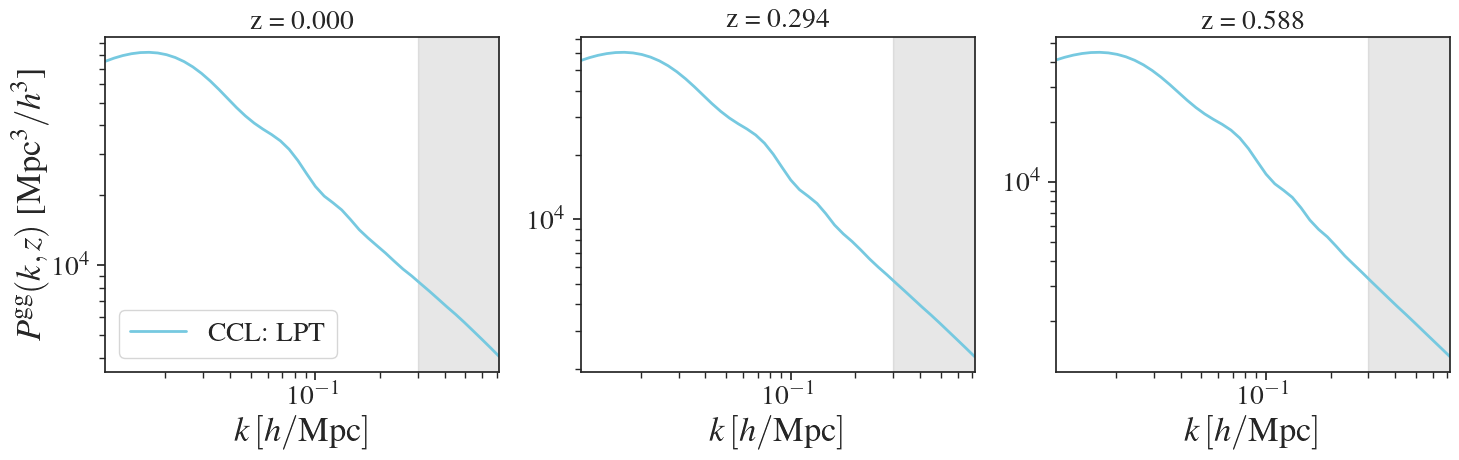

In [103]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5), facecolor='w', sharex=True)
for j, z_ind in enumerate([0, 50, 100]):
    pgg_ccl = pk_gg_ccl_lpt(k*params_bacco['h'], 1./(1.+zz_bacco[z_ind]), cosmo_nl)* params_bacco['h']**3
    ax[j].loglog(k, pgg_ccl, color="#76C9E0")
    ax[j].set_title(f'z = {zz_bacco[z_ind]:.3f}')
    ax[j].axvspan(0.3, k[-1], color='k', alpha=0.1, label='_nolegend_')
    ax[j].set_xlim(k[0], k[-1])
    ax[j].set_xlabel(r'$k\, [h/\rm Mpc]$', fontsize=25)
legend = ['CCL: LPT']
ax[0].legend(legend, fontsize=20)
ax[0].set_ylabel("$P^{\\rm gg}(k, z)$ [Mpc$^3/h^3$]", fontsize=25)
plt.tight_layout()

In [ ]:
pgg_ccl_lpt_all = []
for z_ind in range(len(zz_bacco)):
    pgg_ccl_lpt_all.append(pk_gg_ccl_lpt(k*params_bacco['h'], 1./(1.+zz_bacco[z_ind]), cosmo_nl)* params_bacco['h']**3)
pgg_ccl_lpt_all.append(k*params_bacco['h'])
np.savetxt('external_data/pgg_lpt/ccl_lpt_pgg.txt', pgg_ccl_lpt_all, header='pgg(k, z) in Mpc^3/h^3 for z in zz_bacco = np.linspace(0., 1.5, 256); last line is k in h/Mpc')

In [ ]:
pgg_ccl_lpt_all = []
for z_ind in range(len(zz_bacco)):
    pgg_ccl_lpt_all.append(pk_gg_ccl_lpt_lin(k*params_bacco['h'], 1./(1.+zz_bacco[z_ind]), cosmo_nl)* params_bacco['h']**3)
pgg_ccl_lpt_all.append(k*params_bacco['h'])
np.savetxt('external_data/pgg_lpt/ccl_lpt_pgg_lin.txt', pgg_ccl_lpt_all, header='pgg(k, z) in Mpc^3/h^3 for z in zz_bacco = np.linspace(0., 1.5, 256) with b1_pk_kind=linear and bk2_pk_kind=linear; last line is k in h/Mpc')

In [ ]:
pgg_ccl_lpt_all = []
for z_ind in range(len(zz_bacco)):
    pgg_ccl_lpt_all.append(pk_gg_ccl_lpt_nonlin(k*params_bacco['h'], 1./(1.+zz_bacco[z_ind]), cosmo_nl)* params_bacco['h']**3)
pgg_ccl_lpt_all.append(k*params_bacco['h'])
np.savetxt('external_data/pgg_lpt/ccl_lpt_pgg_nonlin.txt', pgg_ccl_lpt_all, header='pgg(k, z) in Mpc^3/h^3 for z in zz_bacco = np.linspace(0., 1.5, 256) with b1_pk_kind=nonlinear and bk2_pk_kind=nonlinear; last line is k in h/Mpc')